In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/nexus/weather.csv')
df

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,8.0,24.3,0.0,3.4,6.3,NW,30.0,SW,NW,6.0,...,29,1019.7,1015.0,7,7,14.4,23.6,No,3.6,Yes
1,14.0,26.9,3.6,4.4,9.7,ENE,39.0,E,W,4.0,...,36,1012.4,1008.4,5,3,17.5,25.7,Yes,3.6,Yes
2,13.7,23.4,3.6,5.8,3.3,NW,85.0,N,NNE,6.0,...,69,1009.5,1007.2,8,7,15.4,20.2,Yes,39.8,Yes
3,13.3,15.5,39.8,7.2,9.1,NW,54.0,WNW,W,30.0,...,56,1005.5,1007.0,2,7,13.5,14.1,Yes,2.8,Yes
4,7.6,16.1,2.8,5.6,10.6,SSE,50.0,SSE,ESE,20.0,...,49,1018.3,1018.5,7,7,11.1,15.4,Yes,0.0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361,9.0,30.7,0.0,7.6,12.1,NNW,76.0,SSE,NW,7.0,...,15,1016.1,1010.8,1,3,20.4,30.0,No,0.0,No
362,7.1,28.4,0.0,11.6,12.7,N,48.0,NNW,NNW,2.0,...,22,1020.0,1016.9,0,1,17.2,28.2,No,0.0,No
363,12.5,19.9,0.0,8.4,5.3,ESE,43.0,ENE,ENE,11.0,...,47,1024.0,1022.8,3,2,14.5,18.3,No,0.0,No
364,12.5,26.9,0.0,5.0,7.1,NW,46.0,SSW,WNW,6.0,...,39,1021.0,1016.2,6,7,15.8,25.9,No,0.0,No


In [3]:
df.size

8052

In [4]:
df.shape

(366, 22)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MinTemp        366 non-null    float64
 1   MaxTemp        366 non-null    float64
 2   Rainfall       366 non-null    float64
 3   Evaporation    366 non-null    float64
 4   Sunshine       363 non-null    float64
 5   WindGustDir    363 non-null    object 
 6   WindGustSpeed  364 non-null    float64
 7   WindDir9am     335 non-null    object 
 8   WindDir3pm     365 non-null    object 
 9   WindSpeed9am   359 non-null    float64
 10  WindSpeed3pm   366 non-null    int64  
 11  Humidity9am    366 non-null    int64  
 12  Humidity3pm    366 non-null    int64  
 13  Pressure9am    366 non-null    float64
 14  Pressure3pm    366 non-null    float64
 15  Cloud9am       366 non-null    int64  
 16  Cloud3pm       366 non-null    int64  
 17  Temp9am        366 non-null    float64
 18  Temp3pm   

In [16]:
#1.Descriptive Statistics
basic_statistics = df[['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation']].describe()
basic_statistics

,MinTemp,MaxTemp,Rainfall,Evaporation
count,366.000000,366.000000,366.000000,366.000000
mean,7.265574,20.550273,1.428415,4.521858
std,6.025800,6.690516,4.225800,2.669383
min,-5.300000,7.600000,0.000000,0.200000
25%,2.300000,15.025000,0.000000,2.200000
50%,7.450000,19.650000,0.000000,4.200000
75%,12.500000,25.500000,0.200000,6.400000
max,20.900000,35.800000,39.800000,13.800000


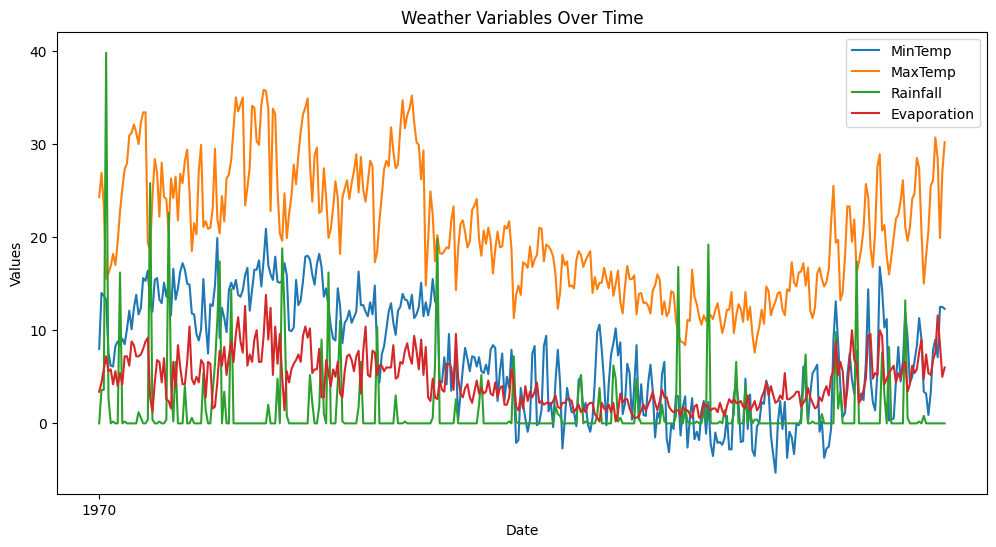

In [17]:
#2.Time Series visualisation
df.index = pd.to_datetime(df.index)

plt.figure(figsize=(12, 6))
plt.plot(df.index, df['MinTemp'], label='MinTemp')
plt.plot(df.index, df['MaxTemp'], label='MaxTemp')
plt.plot(df.index, df['Rainfall'], label='Rainfall')
plt.plot(df.index, df['Evaporation'], label='Evaporation')
plt.title('Weather Variables Over Time')
plt.xlabel('Date')
plt.ylabel('Values')
plt.legend()
plt.show()

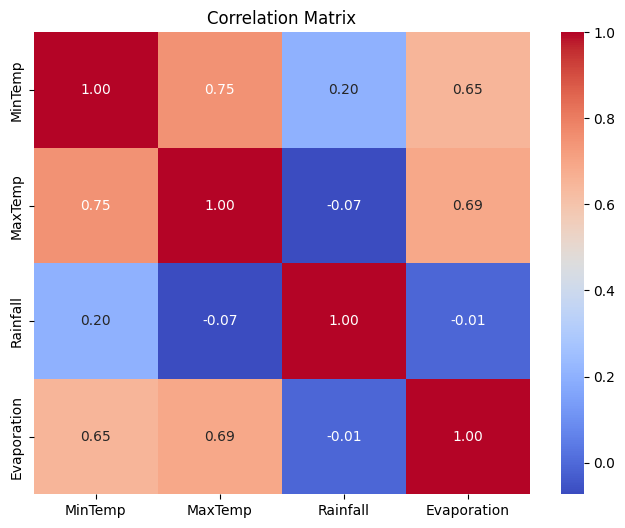

In [19]:
#3.Correlation analysis

correlation_matrix = df[['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()


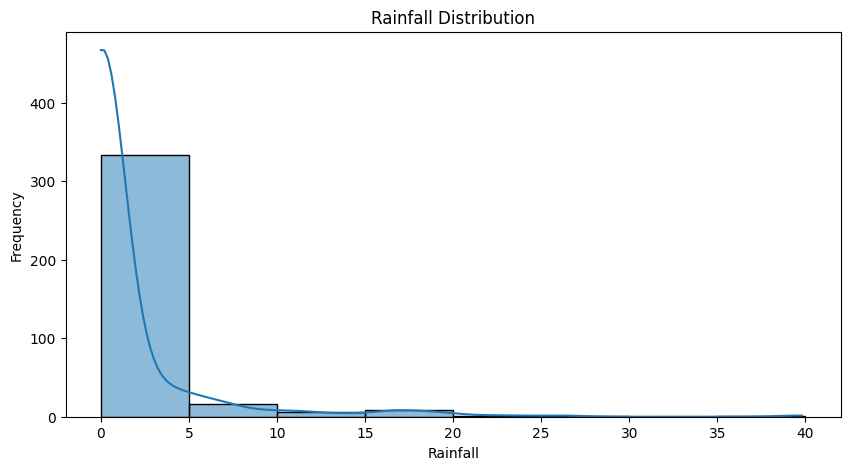

In [10]:
#4.Rainfall Distribution using histogram
plt.figure(figsize=(10, 5))
binwidth=5
sns.histplot(df['Rainfall'],bins=range(0, int(df['Rainfall'].max()) + binwidth, binwidth),kde=True)
plt.title('Rainfall Distribution')
plt.xlabel('Rainfall')
plt.ylabel('Frequency')
plt.show()

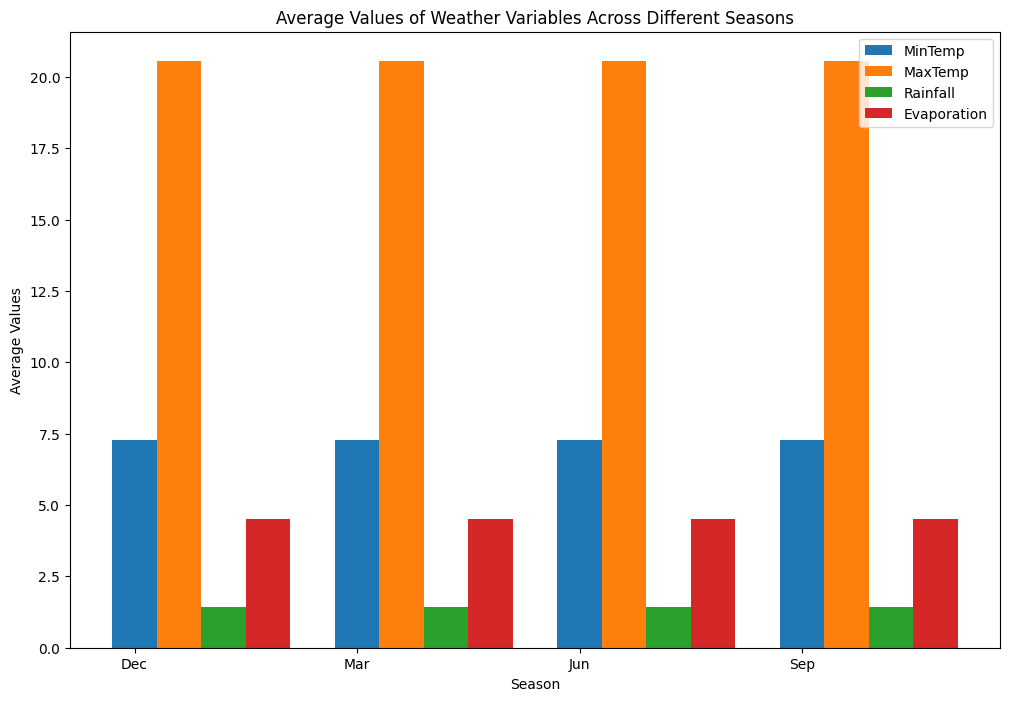

In [20]:
#5.Seasonal analysis
# Extract month from the index and create a new 'Month' column
df['Month'] = df.index.month
# Define seasons and their corresponding months
seasons = {
    'Dec': [12, 1, 2],
    'Mar': [3, 4, 5],
    'Jun': [6, 7, 8],
    'Sep': [9, 10, 11]
}
# Map each month to a season
df['Season'] = df['Month'].apply(lambda x: next(season for season, months in seasons.items() if x in months))
# Group by season and calculate the average values
average_values_by_season = df.groupby('Season')[['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation']].mean()
# Define the order of seasons for plotting
season_order = ['Dec', 'Mar', 'Jun', 'Sep']

# Plotting bar graphs
plt.figure(figsize=(12, 8))
bar_width = 0.2  # Width of the bars
bar_positions = range(len(season_order))

for i, column in enumerate(average_values_by_season.columns):
    plt.bar([pos + bar_width * i for pos in bar_positions], average_values_by_season[column], width=bar_width, label=column)

plt.title('Average Values of Weather Variables Across Different Seasons')
plt.xlabel('Season')
plt.ylabel('Average Values')
plt.xticks(bar_positions, season_order)
plt.legend()
plt.show()
